In [1]:
# Data Processing
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std

# Visualization
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load and look Austin Housing Data
df = pd.read_csv('austinHousingData.csv')
df.head()

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,...,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage
0,111373431,pflugerville,14424 Lake Victor Dr,78660,"14424 Lake Victor Dr, Pflugerville, TX 78660 i...",30.430632,-97.663078,1.98,2,True,...,1,1,1.266667,2.666667,1063,14,3.0,4,2,111373431_ffce26843283d3365c11d81b8e6bdc6f-p_f...
1,120900430,pflugerville,1104 Strickling Dr,78660,Absolutely GORGEOUS 4 Bedroom home with 2 full...,30.432673,-97.661697,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,4,1,120900430_8255c127be8dcf0a1a18b7563d987088-p_f...
2,2084491383,pflugerville,1408 Fort Dessau Rd,78660,Under construction - estimated completion in A...,30.409748,-97.639771,1.98,0,True,...,1,1,1.200000,3.000000,1108,14,2.0,3,1,2084491383_a2ad649e1a7a098111dcea084a11c855-p_...
3,120901374,pflugerville,1025 Strickling Dr,78660,Absolutely darling one story home in charming ...,30.432112,-97.661659,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,3,1,120901374_b469367a619da85b1f5ceb69b675d88e-p_f...
4,60134862,pflugerville,15005 Donna Jane Loop,78660,Brimming with appeal & warm livability! Sleek ...,30.437368,-97.656860,1.98,0,True,...,1,1,1.133333,4.000000,1223,14,3.0,3,2,60134862_b1a48a3df3f111e005bb913873e98ce2-p_f.jpg


In [3]:
# Check Data Types
df.dtypes

zpid                            int64
city                           object
streetAddress                  object
zipcode                         int64
description                    object
latitude                      float64
longitude                     float64
propertyTaxRate               float64
garageSpaces                    int64
hasAssociation                   bool
hasCooling                       bool
hasGarage                        bool
hasHeating                       bool
hasSpa                           bool
hasView                          bool
homeType                       object
parkingSpaces                   int64
yearBuilt                       int64
latestPrice                   float64
numPriceChanges                 int64
latest_saledate                object
latest_salemonth                int64
latest_saleyear                 int64
latestPriceSource              object
numOfPhotos                     int64
numOfAccessibilityFeatures      int64
numOfApplian

In [4]:
# Check Data Shape
df.shape

(15171, 47)

In [5]:
# Checking Duplicate Data
df[df.duplicated(subset=['latitude','longitude'], keep=False)].sort_values('latitude')

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,...,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage


In [6]:
# Check Missing Data
df.isna().sum()

zpid                          0
city                          0
streetAddress                 0
zipcode                       0
description                   0
latitude                      0
longitude                     0
propertyTaxRate               0
garageSpaces                  0
hasAssociation                0
hasCooling                    0
hasGarage                     0
hasHeating                    0
hasSpa                        0
hasView                       0
homeType                      0
parkingSpaces                 0
yearBuilt                     0
latestPrice                   0
numPriceChanges               0
latest_saledate               0
latest_salemonth              0
latest_saleyear               0
latestPriceSource             0
numOfPhotos                   0
numOfAccessibilityFeatures    0
numOfAppliances               0
numOfParkingFeatures          0
numOfPatioAndPorchFeatures    0
numOfSecurityFeatures         0
numOfWaterfrontFeatures       0
numOfWin

In [7]:
df['latest_saledate'].min()


'2018-01-22'

In [8]:
df['latest_saledate'].max()

'2021-01-30'

# Checking Home Type
## Since Single Family(94%), Condo(3%) and Townhouse(1%) making up most of data, remove all other home type

In [9]:
# Checking Home Type
df['homeType'].value_counts()

Single Family            14241
Condo                      470
Townhouse                  174
Multiple Occupancy          96
Vacant Land                 83
Apartment                   37
Residential                 37
Mobile / Manufactured       17
MultiFamily                 10
Other                        6
Name: homeType, dtype: int64

In [10]:
df['homeType'].value_counts(normalize=True)

Single Family            0.938699
Condo                    0.030980
Townhouse                0.011469
Multiple Occupancy       0.006328
Vacant Land              0.005471
Apartment                0.002439
Residential              0.002439
Mobile / Manufactured    0.001121
MultiFamily              0.000659
Other                    0.000395
Name: homeType, dtype: float64

In [11]:
df = df.loc[((df['homeType'] == 'Single Family') | (df['homeType'] == 'Condo')) | (df['homeType'] == 'Townhouse')]
df['homeType'].value_counts()

Single Family    14241
Condo              470
Townhouse          174
Name: homeType, dtype: int64

# Checking Outlier

array([[<AxesSubplot:title={'center':'zpid'}>,
        <AxesSubplot:title={'center':'zipcode'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'propertyTaxRate'}>,
        <AxesSubplot:title={'center':'garageSpaces'}>],
       [<AxesSubplot:title={'center':'parkingSpaces'}>,
        <AxesSubplot:title={'center':'yearBuilt'}>,
        <AxesSubplot:title={'center':'latestPrice'}>,
        <AxesSubplot:title={'center':'numPriceChanges'}>,
        <AxesSubplot:title={'center':'latest_salemonth'}>,
        <AxesSubplot:title={'center':'latest_saleyear'}>],
       [<AxesSubplot:title={'center':'numOfPhotos'}>,
        <AxesSubplot:title={'center':'numOfAccessibilityFeatures'}>,
        <AxesSubplot:title={'center':'numOfAppliances'}>,
        <AxesSubplot:title={'center':'numOfParkingFeatures'}>,
        <AxesSubplot:title={'center':'numOfPatioAndPorchFeatures'}>,
        <AxesSubplot:title={'center

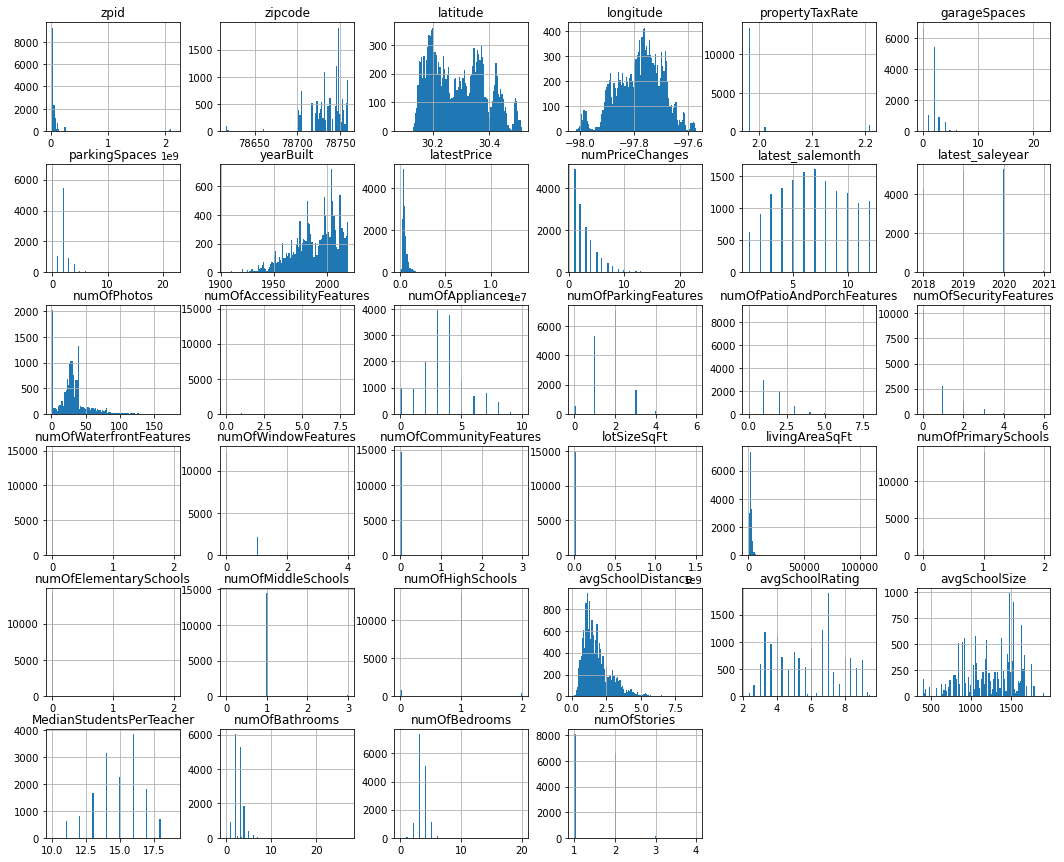

In [23]:
df.hist(figsize=(18,15), bins=100)

In [13]:
df.describe()

,zpid,zipcode,latitude,longitude,propertyTaxRate,garageSpaces,parkingSpaces,yearBuilt,latestPrice,numPriceChanges,...,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories
count,1.488500e+04,14885.000000,14885.000000,14885.000000,14885.000000,14885.000000,14885.000000,14885.000000,1.488500e+04,14885.000000,...,14885.000000,14885.000000,14885.000000,14885.000000,14885.000000,14885.000000,14885.000000,14885.000000,14885.000000,14885.000000
mean,1.043226e+08,78736.002889,30.291861,-97.778845,1.994189,1.228015,1.227410,1988.720188,5.118313e+05,3.032986,...,0.048774,1.034934,0.977628,1.839899,5.791818,1240.229896,14.868525,2.696604,3.441585,1.469332
std,3.170740e+08,18.878188,0.097289,0.084900,0.053282,1.342014,1.342142,21.502760,4.413477e+05,2.481655,...,0.234230,0.260216,0.292515,1.066946,1.859997,325.650322,1.742950,1.025757,0.811867,0.523901
min,2.858495e+07,78617.000000,30.085030,-98.022057,1.980000,0.000000,0.000000,1905.000000,5.500000e+03,1.000000,...,0.000000,0.000000,0.000000,0.200000,2.333333,396.000000,10.000000,0.000000,0.000000,1.000000
25%,2.941135e+07,78727.000000,30.202938,-97.838699,1.980000,0.000000,0.000000,1975.000000,3.090000e+05,1.000000,...,0.000000,1.000000,1.000000,1.100000,4.000000,983.000000,14.000000,2.000000,3.000000,1.000000
50%,2.949520e+07,78739.000000,30.285215,-97.769783,1.980000,1.000000,1.000000,1993.000000,4.050000e+05,2.000000,...,0.000000,1.000000,1.000000,1.566667,6.000000,1298.000000,15.000000,3.000000,3.000000,1.000000
75%,7.033872e+07,78749.000000,30.367332,-97.718246,1.980000,2.000000,2.000000,2006.000000,5.750000e+05,4.000000,...,0.000000,1.000000,1.000000,2.266667,7.000000,1506.000000,16.000000,3.000000,4.000000,2.000000
max,2.146313e+09,78759.000000,30.517174,-97.569504,2.210000,22.000000,22.000000,2020.000000,1.350000e+07,23.000000,...,2.000000,3.000000,2.000000,9.000000,9.500000,1913.000000,19.000000,27.000000,20.000000,4.000000


# Possible Outliers in lastestPrice, lotSizeSqFt, livingAreaSqFt and numOfBathrooms

In [33]:
# Checking lotSizeSqFt outliers
df.sort_values('lotSizeSqFt', ascending=False).head(5)

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,...,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage
14654,58297775,austin,3200 W 35th St,78703,Fabulous 4 Bed 4 Bath house on one of the larg...,30.314316,-97.768044,1.98,5,False,...,1,1,1.633333,7.000000,1298,16,4.0,4,2,58297775_ea7a00b4cbb5788f252f04fce1c9e84a-p_f.jpg
9244,62605548,austin,706 W 22nd St APT 306,78705,Leased for $1695 though 7/31/2020 - Unique gat...,30.285631,-97.745697,1.98,0,True,...,1,1,1.533333,6.000000,1196,16,1.0,2,1,62605548_0b3873e5b78f01227ad3a038c06a6f13-p_f.jpg
11116,145652991,austin,4319 Nitschke St,78723,**Subject to City of Austin SMART Housing and ...,30.294910,-97.698997,1.98,1,True,...,1,1,2.166667,5.000000,966,15,2.0,2,2,145652991_0b5dacd57ed4126cdfdd8d563bb0c043-p_f...
2340,124837778,austin,4304 Front Range Ln,78732,"4304 Front Range Ln, Austin, TX 78732 is a sin...",30.380476,-97.881027,1.98,2,True,...,1,1,1.833333,8.333333,1476,17,3.0,4,2,124837778_99ba1046c98f724f8866c5cdc5afe169-p_f...
4635,202157510,austin,201 Charismatic Pl,78737,"201 Charismatic Pl, Austin, TX 78737 is a sing...",30.205276,-98.011406,2.01,3,True,...,1,1,5.533333,6.666667,1132,16,6.0,5,2,202157510_b30ae95a57301eb1d73cb91350beef3a-p_f...


In [38]:
# Checking livingAreaSqFt outliers
pd.options.display.max_columns = None
df.sort_values('livingAreaSqFt', ascending=True).head(5)

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,hasCooling,hasGarage,hasHeating,hasSpa,hasView,homeType,parkingSpaces,yearBuilt,latestPrice,numPriceChanges,latest_saledate,latest_salemonth,latest_saleyear,latestPriceSource,numOfPhotos,numOfAccessibilityFeatures,numOfAppliances,numOfParkingFeatures,numOfPatioAndPorchFeatures,numOfSecurityFeatures,numOfWaterfrontFeatures,numOfWindowFeatures,numOfCommunityFeatures,lotSizeSqFt,livingAreaSqFt,numOfPrimarySchools,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage
1170,94641643,austin,3003 Brass Buttons Trl,78734,Lake Austin Waterfront lot in Apache Shores! O...,30.381195,-97.915985,1.98,0,True,True,False,True,False,False,Single Family,0,2012,850000.0,4,2018-07-21,7,2018,Agent Provided,49,0,1,0,0,0,0,0,0,23522.4,300.0,1,0,1,1,2.633333,7.000000,1715,16,2.0,2,1,94641643_9764275995e6a1d64eb9ee3383342db7-p_f.jpg
3518,29420819,austin,404 Primrose St,78753,"404 Primrose St, Austin, TX 78753 is a single ...",30.350330,-97.697739,1.98,0,False,False,False,False,False,False,Single Family,0,1945,139000.0,1,2019-07-02,7,2019,Broker Provided,1,0,0,0,0,0,0,0,0,11761.2,306.0,1,0,1,1,0.933333,2.666667,932,14,1.0,1,1,29420819_eacd95953733cf1630001311c5c3d8dd-p_f.jpg
13314,29330022,austin,1405 Hartford Rd APT 202,78703,Old West Austin Efficiency. Close to metro/UT ...,30.284014,-97.762421,1.98,0,True,True,False,True,False,False,Condo,0,1972,175000.0,1,2019-10-01,10,2019,Agent Provided,16,0,3,0,1,1,0,1,0,657.0,378.0,1,0,1,1,0.600000,6.000000,1189,16,1.0,0,1,29330022_325baca18f3fe6664c210987fd58ed8a-p_f.jpg
9213,145658912,austin,1011 W 23rd St APT 103,78705,Very desirable location for UT students only 5...,30.287077,-97.748085,1.98,1,True,True,True,True,False,True,Condo,1,1972,151500.0,5,2018-09-29,9,2018,Agent Provided,1,0,5,2,0,0,0,0,0,815.0,450.0,1,0,1,1,1.400000,6.000000,1196,16,1.0,1,1,145658912_71f342a92115aa75aac958c41f6e7543-p_f...
10118,29385318,austin,2202 E 10th St,78702,Great opportunity to build on your lot in high...,30.264668,-97.717590,1.98,2,True,True,True,True,False,True,Condo,2,2019,499000.0,4,2019-10-22,10,2019,Broker Provided,29,0,3,2,0,1,0,0,0,5837.0,450.0,1,0,1,1,1.033333,5.000000,697,11,1.0,1,2,29385318_8cb1b5c135c1df01c788a481e928d68c-p_f.jpg


In [41]:
# Checking livingAreaSqFt outliers
df.sort_values('livingAreaSqFt', ascending=False).head(5)

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,hasCooling,hasGarage,hasHeating,hasSpa,hasView,homeType,parkingSpaces,yearBuilt,latestPrice,numPriceChanges,latest_saledate,latest_salemonth,latest_saleyear,latestPriceSource,numOfPhotos,numOfAccessibilityFeatures,numOfAppliances,numOfParkingFeatures,numOfPatioAndPorchFeatures,numOfSecurityFeatures,numOfWaterfrontFeatures,numOfWindowFeatures,numOfCommunityFeatures,lotSizeSqFt,livingAreaSqFt,numOfPrimarySchools,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage
705,70330356,austin,201 Marly Way,78733,Level building site with great canyon views an...,30.323517,-97.861473,1.98,0,True,True,False,True,False,False,Single Family,0,2012,385000.0,2,2018-11-12,11,2018,Agent Provided,1,0,0,1,0,0,0,0,0,109335.6,109292.0,0,1,3,0,3.233333,8.000000,1373,14,0.0,5,2,70330356_streetviewsize1025x768location30.3235...
2557,64523076,austin,9704 Saugus Ln,78733,"New Construction, EANES Schools, 4bed 3 bath, ...",30.345898,-97.859985,1.98,0,True,True,False,True,False,False,Single Family,0,2018,829000.0,1,2018-03-08,3,2018,Agent Provided,1,0,1,1,0,0,0,0,0,103237.2,29440.0,0,1,3,0,4.300000,8.000000,1373,14,0.0,1,2,64523076_streetviewlocation9704SaugusLn2CAusti...
2316,125904370,austin,12400 Cedar St,78732,12400 Cedar Street - Villa Del Lago is a uniqu...,30.392859,-97.877609,1.98,5,False,True,True,True,False,True,Single Family,5,2016,13500000.0,2,2018-11-28,11,2018,Agent Provided,13,0,0,2,0,0,0,0,0,710899.2,15394.0,1,0,1,1,2.200000,8.333333,1476,17,13.0,6,1,125904370_a200adec53a31c17278601026747d1ae-p_f...
5328,29327226,austin,3509 Lost Creek Blvd,78735,"*$6,762,377 is Tax Value - Set in exclusive Ba...",30.272158,-97.856033,1.98,7,True,True,True,True,True,False,Single Family,7,2003,2700000.0,4,2018-05-20,5,2018,Agent Provided,39,0,5,3,0,0,0,0,0,138956.4,14091.0,1,0,1,1,4.300000,5.666667,1332,16,10.0,6,3,29327226_811cfb134911b60830174fb4700afc39-p_f.jpg
375,89551873,austin,14800 Flat Top Ranch Rd,78732,GRACIOUS LUXURY ON LAKE AUSTIN\r\nThis award-w...,30.368996,-97.912720,1.98,6,True,True,True,True,True,True,Single Family,6,2014,4950000.0,6,2018-08-17,8,2018,Agent Provided,34,0,3,2,0,0,0,0,0,116740.8,13731.0,1,0,1,1,2.733333,8.333333,1476,17,10.0,5,2,89551873_acca4b6361693761e8631145233ffd75-p_f.jpg


In [42]:
# Dropping Outliers
df.drop(index=[705, 2557], inplace=True)

In [43]:
# Checking numOfBathrooms
df.sort_values('numOfBathrooms', ascending=False).head(5)

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,hasCooling,hasGarage,hasHeating,hasSpa,hasView,homeType,parkingSpaces,yearBuilt,latestPrice,numPriceChanges,latest_saledate,latest_salemonth,latest_saleyear,latestPriceSource,numOfPhotos,numOfAccessibilityFeatures,numOfAppliances,numOfParkingFeatures,numOfPatioAndPorchFeatures,numOfSecurityFeatures,numOfWaterfrontFeatures,numOfWindowFeatures,numOfCommunityFeatures,lotSizeSqFt,livingAreaSqFt,numOfPrimarySchools,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage
2838,111972888,austin,4212 Far West Blvd,78731,Well-maintained home in highly desirable North...,30.361406,-97.769707,1.98,2,False,True,True,True,False,False,Single Family,2,1967,745000.0,1,2020-10-20,10,2020,Agent Provided,46,0,4,2,0,0,0,0,0,10236.0,2137.0,1,0,1,1,0.933333,7.000000,1483,16,27.0,4,1,111972888_a88e572d95e496b1b5d9a591800497c4-p_f...
2316,125904370,austin,12400 Cedar St,78732,12400 Cedar Street - Villa Del Lago is a uniqu...,30.392859,-97.877609,1.98,5,False,True,True,True,False,True,Single Family,5,2016,13500000.0,2,2018-11-28,11,2018,Agent Provided,13,0,0,2,0,0,0,0,0,710899.2,15394.0,1,0,1,1,2.200000,8.333333,1476,17,13.0,6,1,125904370_a200adec53a31c17278601026747d1ae-p_f...
613,96645484,austin,9113 Camelback Dr,78733,"Sweeping views abound from this 10,802-square-...",30.331038,-97.855659,1.98,3,True,True,True,True,False,False,Single Family,3,2007,2750000.0,7,2018-05-02,5,2018,Agent Provided,40,0,1,3,0,0,0,0,0,43560.0,10611.0,0,1,3,0,3.500000,8.000000,1373,14,10.0,6,2,96645484_e4e001ce15ff42bfbabde6132a448d6b-p_f.jpg
2547,119986580,austin,305 Marly Way,78733,Open floor plan with ample light. Unbelievabl...,30.324699,-97.861267,1.98,4,True,True,True,True,True,True,Single Family,4,2014,2795000.0,7,2019-03-07,3,2019,Broker Provided,38,0,8,2,0,0,0,0,0,82328.4,11581.0,0,1,3,0,3.266667,8.000000,1373,14,10.0,7,3,119986580_78f3d8efe270d9fb52d91cd30683d375-p_f...
184,124843021,austin,13115 Perryton Dr,78732,This highly custom home sits on a well-establi...,30.338959,-97.926979,1.98,4,True,True,True,True,True,True,Single Family,4,2014,4100000.0,3,2020-12-23,12,2020,Broker Provided,149,0,8,3,0,0,0,0,0,172497.6,9866.0,1,0,1,1,3.433333,8.333333,1533,17,10.0,6,2,124843021_38aeda802d6cf001f7befec5a053d009-p_f...


In [44]:
# First property number of Bathrooms data is typo based on zillow report (https://www.zillow.com/homedetails/4212-Far-West-Blvd-Austin-TX-78731/111972888_zpid/)
# Correcting 27 bathroom to 3 bathroom
df.loc[df.index==2838, 'numOfBathrooms'] = 3.0

In [45]:
df.sort_values('numOfBathrooms', ascending=True).head(5)

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,hasCooling,hasGarage,hasHeating,hasSpa,hasView,homeType,parkingSpaces,yearBuilt,latestPrice,numPriceChanges,latest_saledate,latest_salemonth,latest_saleyear,latestPriceSource,numOfPhotos,numOfAccessibilityFeatures,numOfAppliances,numOfParkingFeatures,numOfPatioAndPorchFeatures,numOfSecurityFeatures,numOfWaterfrontFeatures,numOfWindowFeatures,numOfCommunityFeatures,lotSizeSqFt,livingAreaSqFt,numOfPrimarySchools,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage
14357,29335803,austin,2709 Townes Ln,78703,"Remodeled Tarry Town Jewel, Grand entry highli...",30.298880,-97.767937,1.98,2,False,True,True,True,False,True,Single Family,2,1953,800000.0,12,2020-06-29,6,2020,Broker Provided,74,0,1,3,2,1,0,2,0,8232.0,3779.0,1,0,1,1,0.966667,7.000000,1298,16,0.0,4,2,29335803_70701913bfe3cdd5bef63a96ce791da9-p_f.jpg
1842,94642666,austin,10640 Senna Hills Dr,78733,Wow! Reduced! First time on the market! Move i...,30.312716,-97.900482,1.98,2,True,True,True,True,False,True,Single Family,2,2011,895000.0,5,2020-06-24,6,2020,Agent Provided,35,0,3,2,0,0,0,0,0,12196.8,3809.0,0,1,3,0,2.766667,9.333333,1360,14,0.0,0,2,94642666_5d6e752fd9e13c6e7241c68017dd5319-p_f.jpg
4491,114157301,austin,348 Drury Ln,78737,"348 Drury Ln, Austin, TX 78737 is a single fam...",30.200550,-97.969345,2.01,3,True,True,True,True,False,True,Single Family,3,2011,342400.0,10,2019-01-14,1,2019,Public Record,5,0,5,4,0,0,0,0,1,8712.0,2557.0,1,0,1,1,3.866667,7.000000,1135,16,0.0,4,1,114157301_b2526db0734cad6063baa4ee6d73132c-p_f...
4464,63596867,austin,200 Lexington Dr,78737,"200 Lexington Dr, Austin, TX 78737 is a single...",30.199942,-97.984703,2.01,0,True,True,False,True,False,False,Single Family,0,2004,409900.0,2,2020-07-06,7,2020,Agent Provided,9,0,0,1,0,0,0,0,0,10890.0,2232.0,1,0,1,0,4.300000,6.000000,777,16,0.0,4,1,63596867_72880d399c2a52ac18e704d18a5785b3-p_f.jpg
6646,29503854,austin,8604 Oak Ledge Dr,78748,"8604 Oak Ledge Dr, Austin, TX 78748 is a singl...",30.188589,-97.823662,1.98,0,False,True,False,True,False,False,Single Family,0,1971,450000.0,1,2019-08-07,8,2019,Broker Provided,1,0,4,2,2,0,0,2,0,17424.0,1660.0,1,0,1,1,2.266667,5.666667,1537,16,0.0,0,1,29503854_streetviewlocation8604OakLedgeDr2CAus...


In [46]:
# Some list has 0 Bathrooms and 0 Bedrooms which does not sound right.
# Inputting typical bathroom count per bedroom count based on year builit then drop any listing with 0 Bathrooms and 0 Bedrooms
df.loc[(df['numOfBathrooms']==0) & (df['numOfBedrooms']>0) & (df['yearBuilt'] > 1989), 'numOfBathrooms'] = 2
df.loc[(df['numOfBathrooms']==0) & (df['numOfBedrooms']>0) & (df['yearBuilt'] <= 1989), 'numOfBathrooms'] = 1
df.loc[(df['numOfBathrooms']==0) & (df['numOfBedrooms']>=3) & (df['yearBuilt'] > 1989), 'numOfBathrooms'] = 2.5
df.loc[(df['numOfBathrooms']==0) & (df['numOfBedrooms']>=3) & (df['yearBuilt'] <= 1989), 'numOfBathrooms'] = 2

df.drop(df[df['numOfBathrooms']==0].index, inplace=True)
df.drop(df[df['numOfBedrooms']==0].index, inplace=True)

In [47]:
# Checking numOfBedrooms
df.sort_values('numOfBedrooms', ascending=False).head(5)

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,hasCooling,hasGarage,hasHeating,hasSpa,hasView,homeType,parkingSpaces,yearBuilt,latestPrice,numPriceChanges,latest_saledate,latest_salemonth,latest_saleyear,latestPriceSource,numOfPhotos,numOfAccessibilityFeatures,numOfAppliances,numOfParkingFeatures,numOfPatioAndPorchFeatures,numOfSecurityFeatures,numOfWaterfrontFeatures,numOfWindowFeatures,numOfCommunityFeatures,lotSizeSqFt,livingAreaSqFt,numOfPrimarySchools,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage
8597,2094498207,austin,4902 Duval Rd R2 #R2,78727,"Lovely convenient condo, with a private wooded...",30.415489,-97.737213,1.98,0,True,True,False,True,False,True,Condo,0,1985,174900.0,2,2020-11-13,11,2020,Agent Provided,25,0,4,1,0,0,0,0,0,5227.0,916.0,1,0,1,1,2.400000,6.000000,1474,15,2.0,20,1,2094498207_76320ecfd86161cc1d91c46c95c1afcf-p_...
8531,58306332,austin,3906 Hawkshead Dr,78727,Enjoy this home across from The Domain! Comple...,30.416149,-97.722801,1.98,2,False,True,True,True,False,False,Single Family,2,2006,650000.0,1,2020-08-05,8,2020,Agent Provided,36,0,2,2,2,3,0,1,0,9191.0,4712.0,1,0,1,1,2.666667,6.666667,1486,15,4.0,8,2,58306332_c0963729ec7bd42164615c02d9825a50-p_f.jpg
14435,29401385,austin,4302 Avenue G APT C,78751,Charming 3-unit multifamily property built by ...,30.305981,-97.728012,1.98,0,False,False,False,True,False,False,Single Family,0,1925,750000.0,1,2018-04-27,4,2018,Agent Provided,15,0,0,1,0,0,0,0,0,5662.0,2340.0,1,0,1,1,1.433333,7.333333,1142,15,4.0,7,2,29401385_19535e7778c048c5b703ef78b6b40c77-p_f.jpg
2547,119986580,austin,305 Marly Way,78733,Open floor plan with ample light. Unbelievabl...,30.324699,-97.861267,1.98,4,True,True,True,True,True,True,Single Family,4,2014,2795000.0,7,2019-03-07,3,2019,Broker Provided,38,0,8,2,0,0,0,0,0,82328.4,11581.0,0,1,3,0,3.266667,8.000000,1373,14,10.0,7,3,119986580_78f3d8efe270d9fb52d91cd30683d375-p_f...
9314,29384319,austin,1310 E 2nd St,78702,"Contact owner for showing, day before advance ...",30.260422,-97.730194,1.98,2,False,True,True,True,False,True,Single Family,2,1915,599995.0,7,2020-03-17,3,2020,Agent Provided,1,0,3,3,0,0,0,0,0,6577.0,2403.0,1,0,1,1,1.100000,4.666667,992,14,7.0,7,2,29384319_8c7c32099fdfd1895eb36b68cbad62c9-p_f.jpg


In [48]:
# First list should have 2 Bedrooms not 20 (https://www.zillow.com/homedetails/4902-Duval-Rd-APT-R2-Austin-TX-78727/63836867_zpid/)
df.loc[df.index==8597, 'numOfBedrooms'] = 2

In [50]:
# Checking garageSpaces
df.sort_values('garageSpaces', ascending=False).head(10)

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,hasCooling,hasGarage,hasHeating,hasSpa,hasView,homeType,parkingSpaces,yearBuilt,latestPrice,numPriceChanges,latest_saledate,latest_salemonth,latest_saleyear,latestPriceSource,numOfPhotos,numOfAccessibilityFeatures,numOfAppliances,numOfParkingFeatures,numOfPatioAndPorchFeatures,numOfSecurityFeatures,numOfWaterfrontFeatures,numOfWindowFeatures,numOfCommunityFeatures,lotSizeSqFt,livingAreaSqFt,numOfPrimarySchools,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage
6885,145656156,austin,705 Mc Queen St #34,78745,Beautiful 2-story home located in highly sough...,30.189331,-97.792809,1.98,22,True,True,True,True,False,True,Condo,22,2016,399000.0,1,2020-11-15,11,2020,Agent Provided,30,0,2,2,3,0,0,0,0,6621.0,2080.0,1,0,1,1,0.866667,3.333333,926,13,3.0,4,1,145656156_7eaa8fc35c2a80099dae663115c8e34a-p_f...
4533,28587235,austin,13100 Rooster Springs Rd,78737,Enjoy country living with the convenience of t...,30.204746,-97.991356,2.01,20,False,True,True,True,False,True,Single Family,20,2018,824900.0,2,2018-03-08,3,2018,Agent Provided,3,0,7,3,0,0,0,0,0,337590.0,4004.0,1,0,1,1,6.766667,6.666667,1132,16,5.0,4,1,28587235_5a6a7b48074e944ed02a280f06dfaa43-p_f.jpg
6805,29502805,austin,7600 Elm Forest Rd,78745,Gorgeous 3/2 home owner remodel on almost 2/3 ...,30.190971,-97.800804,1.98,12,False,True,True,True,False,False,Single Family,12,1960,525000.0,7,2019-08-19,8,2019,Agent Provided,33,0,8,1,2,2,0,2,0,27007.2,1806.0,1,0,1,1,1.566667,3.333333,1409,14,2.0,3,1,29502805_59509f778dbf2a2d4ff966ffd89f01f6-p_f.jpg
11108,29409917,austin,1405 Berkshire Dr,78723,Beautifully renovated single story mid-century...,30.317060,-97.697220,1.98,12,False,True,True,True,False,True,Single Family,12,1955,500000.0,2,2020-11-10,11,2020,Agent Provided,29,0,3,2,2,0,0,0,0,7797.0,1209.0,1,0,1,1,0.700000,3.000000,849,14,2.0,3,1,29409917_884d8f325332b7b38909b77751e3b189-p_f.jpg
6985,29494837,austin,6907 Cherrydale Dr,78745,Beautifully remodeled home in HOT 78745!! This...,30.200857,-97.803902,1.98,12,False,True,True,True,False,True,Single Family,12,1972,328000.0,3,2020-12-28,12,2020,Agent Provided,46,0,4,2,1,0,0,0,0,7927.0,880.0,1,0,1,1,1.233333,4.000000,840,13,1.0,3,1,29494837_df65b7181d2b1d4749672b8b95f365b0-p_f.jpg
9240,29396074,austin,908 Keith Ln,78705,Keith Lane is has our homes strategically plac...,30.291706,-97.725502,1.98,12,False,True,True,True,False,False,Single Family,12,2003,3400000.0,1,2020-04-01,4,2020,Agent Provided,20,0,5,4,0,0,0,0,0,20908.8,3075.0,1,0,1,1,1.233333,7.333333,1142,15,3.0,6,2,29396074_b1521d52623a64343f61e3093ea83446-p_f.jpg
4777,29331364,austin,3301 Barton Creek Blvd,78735,Privately gated Barton Creek estate on 1.58 Ac...,30.283585,-97.875526,1.98,12,True,True,True,True,True,False,Single Family,12,1991,1595000.0,15,2020-12-04,12,2020,"Compass RE Texas, LLC",72,0,3,3,2,1,0,0,0,68824.8,5170.0,1,0,1,1,5.366667,5.666667,1332,16,5.0,4,2,29331364_70cdb457329d7f8822ea9907032f8716-p_f.jpg
9201,29445509,austin,13712 Ann Pl,78728,"13712 Ann Pl, Austin, TX 78728 is a single fam...",30.427391,-97.675156,1.98,10,False,True,True,True,False,False,Single Family,10,1979,279900.0,7,2020-10-30,10,2020,Broker Provided,67,0,4,2,2,3,0,0,0,16552.8,1819.0,1,0,1,1,0.666667,2.666667,1063,14,2.0,3,1,29445509_0c325b27dea25aa27f1e9f100a2a0327-p_f.jpg
6230,29327172,austin,1814 Randolph Ridge Trl,78746,"Stunning home in Eanes, minutes from downtow...",30.272011,-97.821548,1.98,10,True,True,True,True,True,True,Single Family,10,1999,1850000.0,5,2018-09-13,9,2018,Agent Provided,39,0,6,3,0,0,0,0,0,30056.4,5792.0,0,1,1,0,0.550000,9.500000,1630,14,5.0,5,2,29327172_651d5bacae22a9c8f693720e0047ac3f-p_f.jpg
15164,125807167,austin,8707 Leo St,78745,Brand new construction. High end home that si...,30.189131,-97.825455,1.98,10,False,True,True,True,Tru